# Stackoverflow survey results

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

schema_df = pd.read_csv('survey-results-schema.csv')
survey_df = pd.read_csv('survey-results-public.csv')

In [67]:
# Over view of the result DataFrame
survey_df.head(2)

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0


In [68]:
schema_df.head()

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."


<AxesSubplot:>

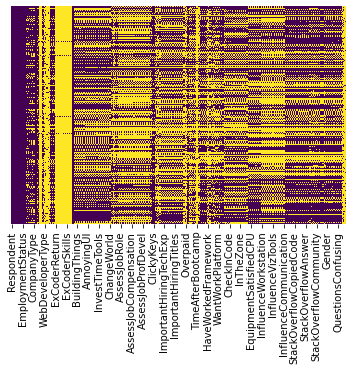

In [69]:
sns.heatmap(survey_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

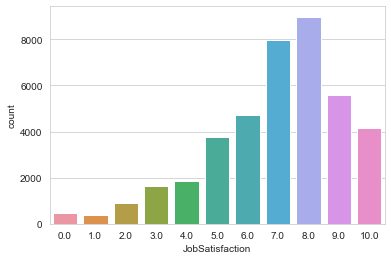

In [70]:
sns.set_style('whitegrid')
sns.countplot(x='JobSatisfaction',data=survey_df)

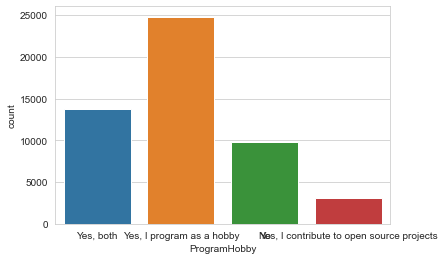

In [75]:
sns.set_style('whitegrid')
sns.countplot(x='ProgramHobby',data=survey_df);

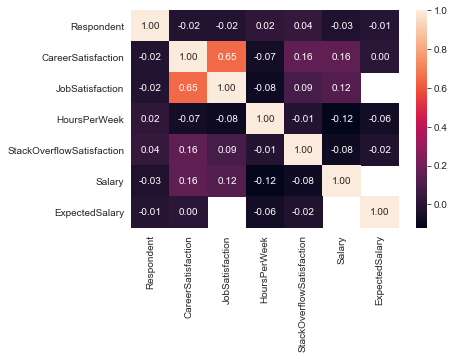

In [84]:
sns.heatmap(survey_df.corr(), annot=True, fmt=".2f");

## Is empoyment status has relation to job statisfaction?

In [73]:
# Over view of the schema DataFrame
schema_df.head(5)

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."


In [5]:
# Checking non value in the DataFrame
survey_df['EmploymentStatus'].isnull().mean()

0.0

In [15]:
# Checking non value in the DataFrame
survey_df['JobSatisfaction'].isnull().mean()

0.21435242839352428

In [16]:
# Checking non value in the DataFrame
survey_df.columns[survey_df.isnull().mean()==0]

Index(['Respondent', 'Professional', 'ProgramHobby', 'Country', 'University',
       'EmploymentStatus', 'FormalEducation'],
      dtype='object')

In [18]:
# Fill the job satisfaction,fill 21.4% with mean value of JobSatisfaction
survey_df['JobSatisfaction'] = survey_df['JobSatisfaction'].fillna(survey_df['JobSatisfaction'].mean())
survey_df['JobSatisfaction'].isnull().mean()

0.0

In [23]:
survey_df.groupby('EmploymentStatus').mean()['JobSatisfaction'].sort_values(ascending=False)

EmploymentStatus
Independent contractor, freelancer, or self-employed    7.202299
Not employed, and not looking for work                  6.957094
I prefer not to say                                     6.957078
Retired                                                 6.957078
Not employed, but looking for work                      6.957078
Employed full-time                                      6.928428
Employed part-time                                      6.879209
Name: JobSatisfaction, dtype: float64

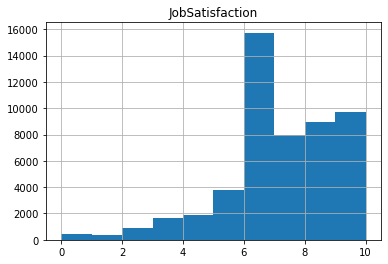

In [29]:
ej = survey_df[['EmploymentStatus','JobSatisfaction']]
ej.hist(bins=10);

#### The job satisfaction level of the Independent contractor, freelancer, or self-employed is higher then any other group.

## Are you a hobby programmer or/and contributor to open source projects, how it is related to job satisfaction?

In [37]:
# Checking the na value in the program hobby
survey_df['ProgramHobby'].isnull().mean()

0.0

In [39]:
survey_df.groupby('ProgramHobby').mean()['JobSatisfaction'].sort_values(ascending=False)

ProgramHobby
Yes, both                                    7.108041
Yes, I contribute to open source projects    7.041535
Yes, I program as a hobby                    6.913072
No                                           6.833825
Name: JobSatisfaction, dtype: float64

#### The reslut shown that hobby and conributes have more satisfaction level in that group.

## Does Salary gives you job satisfaction?

In [58]:
# The result show data frame contains null values to it
survey_df['Salary'].isnull().sum().sum()/len(survey_df)
survey_df.isnull().mean().sort_values(ascending=True)

Respondent            0.000000
Professional          0.000000
ProgramHobby          0.000000
Country               0.000000
University            0.000000
                        ...   
ExCoderBalance        0.982040
ExCoderReturn         0.982040
ExCoderWillNotCode    0.982059
ExCoderNotForMe       0.982079
ExCoder10Years        0.982157
Length: 154, dtype: float64

In [59]:
# Checking Salary Column for null values
survey_df['Salary'].isnull().mean()

0.7491632938978829

In [62]:
drop_sal = survey_df.dropna(subset=['Salary'])
drop_sal.head(2)

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
14,15,Professional developer,"Yes, I program as a hobby",United Kingdom,No,Employed full-time,Professional degree,Computer engineering or electrical/electronics...,All or almost all the time (I'm full-time remote),"5,000 to 9,999 employees",...,Disagree,Male,High school,White or of European descent,Somewhat agree,Agree,Disagree,Agree,100000.0,NaN


In [63]:
drop_sal.groupby('JobSatisfaction').mean()['Salary']

JobSatisfaction
0.0     47111.799610
1.0     48100.740801
2.0     48289.403289
3.0     49952.709955
4.0     47201.877289
5.0     49478.845404
6.0     53221.769136
7.0     54093.964298
8.0     59485.961163
9.0     64089.922631
10.0    61440.444486
Name: Salary, dtype: float64

#### Result shown that job satisfaction and salary has direct relationship between both of them.

In [88]:
# Gender and Job Satisfaction
survey_df['Gender'] = survey_df['Gender'].fillna(survey_df['Gender'].mode()[0])
survey_df['Gender'].isnull().mean()
survey_df.groupby('Gender').mean()['JobSatisfaction'].sort_values(ascending=False)
# Transgender seems happy

Gender
Gender non-conforming; Other                               9.000000
Male; Transgender; Gender non-conforming                   8.000000
Female; Transgender; Other                                 8.000000
Male; Female; Transgender; Gender non-conforming           7.750000
Male; Transgender                                          7.714286
Female; Transgender; Gender non-conforming                 7.500000
Female; Gender non-conforming                              7.250000
Male; Other                                                7.085938
Female; Transgender; Gender non-conforming; Other          7.000000
Male; Female; Other                                        7.000000
Male                                                       6.961638
Female                                                     6.936620
Female; Transgender                                        6.735294
Other                                                      6.730496
Transgender                              